# Forecasting US Interest Rate: By Support Vector Regression(SVR) Model

## Introduction

Support Vector Regression (SVR) is a supervised machine learning algorithm derived from Support Vector Machines (SVM). While SVM is primarily designed for classification tasks, SVR adapts the principles of SVM to predict continuous outcomes, offering a robust and flexible approach to regression problems. It is especially popular in cases where the data contains noise, and the relationship between input and output variables is not strictly linear.

The core idea of SVR is to find a function that approximates the relationship between input features and output values while maintaining a margin of tolerance (epsilon, ε) around the predicted value. Unlike traditional regression models, SVR focuses on minimizing the error within this margin rather than minimizing the overall error, which makes it robust to outliers and noise in the data.

SVR is a powerful and versatile tool for regression tasks, offering strong generalization, robustness to noise, and the ability to handle both linear and non-linear relationships. Its flexibility and adaptability make it a popular choice in applications ranging from financial forecasting to engineering and healthcare. However, its computational complexity and sensitivity to hyperparameters require careful tuning and consideration for large datasets.In this chapter, we employ the SVR model to predict the Federal Funds Rate (FEDFUNDS) as part of achieving the project's objectives. 

In [47]:
#Standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

## Data Processing

The data preprocessing section was mainly adapted from the code provided by Professor C-Y (Eric) NG in the Econ 5060 course. Macroeconomic data were preprocessed to address missing values, transform variables, standardize features, and construct lagged features to capture temporal dependencies and patterns within the time series.

In [48]:
macro = pd.read_csv(r'D:\HuaweiMoveData\Users\WRY\Desktop\US FRED-MD Macro Dataset.csv', header=0, index_col=0, parse_dates=True)
macro.shape

(773, 127)

In [49]:
macro

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2442.158,2293.2,17.272,2.922664e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1959-01-02,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
1959-01-03,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
1959-01-04,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
1959-01-05,2498.026,2350.4,17.765,3.013643e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,20.0130,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,17821.000,14623.3,130.028,1.581882e+06,692501.00000,102.5080,101.2863,101.3295,102.0755,104.8646,...,114.885,134.903,28.91,33.44,25.82,64.9,383384.74,720635.04,5505.6964,20.2269
2023-01-02,17839.528,14622.7,129.991,1.575290e+06,687942.00000,102.5023,101.0873,101.1983,102.1753,105.0877,...,115.279,135.397,28.98,33.61,25.81,67.0,385165.01,718917.35,5491.3981,20.2141
2023-01-03,17885.887,14664.3,129.948,1.560472e+06,681673.00000,102.6521,101.0102,101.1678,102.4580,103.9786,...,114.930,135.782,29.12,33.79,25.95,62.0,388912.72,719670.11,5366.2449,22.0446


In [50]:
# Imports data
tran_code = pd.read_csv(r'D:\HuaweiMoveData\Users\WRY\Desktop\US FRED-MD Macro code trans.csv', header=0, index_col=0, parse_dates=False)
tran_code.shape

(1, 127)

In [51]:
tran_code

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Symbol,,,,,,,,,,,,,,,,,,,,,
Tran_code,5,5,5,5,5,5,5,5,5,5,...,6,6,6,6,6,2,6,6,6,1


In [52]:
def data_transform(x, tran_code):
    
    if tran_code == 1:
        x_tr = x        
        
    elif tran_code == 2:
        x_tr = x.diff()
            
    elif tran_code == 3:
        x_tr = x.diff().diff()
        
    elif tran_code == 4:
        x_tr = np.log(x)
        
    elif tran_code == 5:
        x_tr = np.log(x).diff()*100
    
    elif tran_code == 6:
        x_tr = np.log(x).diff().diff()*100
    
    else:
        x_tr = (x.pct_change()-1)*100
    
    return x_tr    

In [53]:
macro_tr=[]

for col in macro.columns:
    tr_code = tran_code[col].values
    data_tr = data_transform(macro[col], tr_code)
    macro_tr.append(data_tr)

macro_tr = pd.DataFrame(macro_tr).T

In [54]:
macro_tr

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,0.393140,0.361286,1.036756,0.735762,0.730985,1.939060,1.340746,0.862504,0.731050,0.523479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,0.643011,0.735934,0.941009,-0.342293,0.832120,1.430562,0.603538,0.489413,0.000000,1.939253,...,-0.112407,0.026180,-0.002184,-0.814665,0.481883,NaN,0.492915,0.413844,-1.479236,NaN
1959-01-04,0.649412,0.704864,-0.363947,1.992210,0.061571,2.107542,1.433800,1.454467,1.565020,0.638320,...,0.134899,0.175237,-0.002163,1.220345,-0.488953,NaN,1.213403,0.673430,2.492924,NaN
1959-01-05,0.576311,0.661646,1.200535,0.679731,0.780340,1.495451,0.826987,0.958168,0.477012,2.014866,...,-0.168653,-0.193673,-0.002143,-0.408972,-0.481929,NaN,0.282830,0.202040,-1.534223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141
2023-01-03,0.259530,0.284085,-0.033085,-0.945104,-0.915446,0.146036,-0.076300,-0.030143,0.276299,-1.061013,...,-0.645568,-0.081575,0.240091,0.027041,0.579697,-5.0,0.505030,0.343295,-2.045412,22.0446


In [55]:
target_column = 'FEDFUNDS'
EFFR = macro_tr[target_column]
macro_tr = macro_tr.drop(columns=[target_column])
macro_tr[target_column] = EFFR
EFFR

sasdate
1959-01-01     NaN
1959-01-02   -0.05
1959-01-03    0.37
1959-01-04    0.16
1959-01-05   -0.06
              ... 
2023-01-01    0.23
2023-01-02    0.24
2023-01-03    0.08
2023-01-04    0.18
2023-01-05    0.23
Name: FEDFUNDS, Length: 773, dtype: float64

In [56]:
# Show rows and columns
print("Rows, Columns:");print(macro_tr.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(macro_tr.columns);print("\n")

# Show info on DataFrame
print("Info:");print(macro_tr.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(macro_tr.count()); print("\n")

# Show head
print("Head");print(macro_tr.head()); print("\n")

# Show tail
print("Tail");print(macro_tr.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(macro_tr.describe());print("\n")

Rows, Columns:
(773, 127)


Columns:
Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'DSERRG3M086SBEA', 'CES0600000008', 'CES2000000008', 'CES3000000008',
       'UMCSENTx', 'DTCOLNVHFNM', 'DTCTHFNM', 'INVEST', 'VIXCLSx', 'FEDFUNDS'],
      dtype='object', length=127)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 773 entries, 1959-01-01 to 2023-01-05
Data columns (total 127 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    RPI              772 non-null    float64
 1    W875RX1          772 non-null    float64
 2    DPCERA3M086SBEA  772 non-null    float64
 3    CMRMTSPLx        771 non-null    float64
 4    RETAILx          772 non-null    float64
 5    INDPRO           772 non-null    float64
 6    IPFPNSS          772 non-null    float64
 7    IPFINAL          772 non-null    float64
 8    IPCONGD          772 n

In [57]:
threshold = 0.05
missing_ratio_c = macro_tr.isnull().mean()
columns_to_drop = missing_ratio_c[missing_ratio_c > threshold].index
macro_tr_cleaned_c = macro_tr.drop(columns=columns_to_drop)
print(columns_to_drop)

Index(['ACOGNO', 'ANDENOx', 'TWEXAFEGSMTHx', 'UMCSENTx', 'VIXCLSx'], dtype='object')


In [58]:
threshold = 0.3
missing_ratio_r = macro_tr.isnull().mean(axis=1)
rows_to_drop = missing_ratio_r[missing_ratio_r > threshold].index
macro_tr_cleaned_r = macro_tr_cleaned_c.drop(rows_to_drop)
print(rows_to_drop)

DatetimeIndex(['1959-01-01', '1959-01-02'], dtype='datetime64[ns]', name='sasdate', freq=None)


In [59]:
macro_final = macro_tr_cleaned_r

In [60]:
#Define Data for Machine Learning

X_start = 0 
X_lag = 1

# Features and Target
X  = macro_final.iloc[X_start:,:-1].shift(X_lag) 
y  = macro_final.iloc[X_start:,121]

X = X.dropna()

y = y.loc[X.index]

In [61]:
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST
sasdate,,,,,,,,,,,,,,,,,,,,,
1960-01-02,0.319409,0.463825,0.278847,1.695646,2.660551,2.591713,2.409495,2.902087,3.123538,10.383083,...,-0.171620,-0.259079,-0.178584,-0.128845,-0.468036,0.779728,-0.970531,0.429236,-1.173886,-1.333027
1960-01-03,0.114254,0.091674,0.433454,1.437148,0.369645,-0.893885,-0.568540,-0.343503,-1.145653,-1.385485,...,0.159303,0.376462,0.167438,0.085463,-0.455545,0.385334,-0.475018,0.826845,0.538766,-1.894229
1960-01-04,0.190876,0.091590,1.404092,-2.802612,-0.110199,-0.901948,-0.342682,-0.115042,0.115277,-1.996461,...,-0.049056,-0.455511,0.178561,-0.111313,-0.002011,3.013134,-0.468385,0.347209,0.095090,0.348999
1960-01-05,0.341874,0.361379,1.535528,0.982647,2.590339,-0.795880,0.228983,0.115042,0.687998,-0.118913,...,0.311430,0.411911,0.443860,0.145034,-0.894856,-6.807429,0.000000,0.867818,0.545173,2.413598
1960-01-06,0.240054,0.244332,-2.034337,-3.153052,-1.504683,-0.114277,0.568790,0.686244,0.569884,0.945486,...,-0.262920,-0.129782,-0.672338,0.059133,0.894856,4.161967,0.000000,-0.482728,-0.206712,0.379810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,0.000898,-0.075962,-0.414455,-0.947270,-1.320097,-0.330005,-0.332552,-0.400833,-0.179349,-2.240469,...,-0.248867,-0.174864,-0.884680,-0.056635,0.102595,-0.062401,0.389154,0.162379,-0.007056,0.959749
2023-01-01,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,0.030879,0.344041,-0.613838,0.175427,-0.107940,0.300155,-0.590025,-0.283245,-0.123254,0.880929
2023-01-02,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,0.382455,0.474433,1.425376,0.033243,0.170724,-0.004386,0.309575,0.071035,0.049043,-0.142513


In [62]:
y

sasdate
1960-01-02   -0.02
1960-01-03   -0.13
1960-01-04    0.08
1960-01-05   -0.07
1960-01-06   -0.53
              ... 
2022-01-12    0.32
2023-01-01    0.23
2023-01-02    0.24
2023-01-03    0.08
2023-01-04    0.18
Name: FEDFUNDS, Length: 757, dtype: float64

## Dimensionality Reduction: By Selecting KBest Features

In this section, we reduce the dimensionality of the input features by the method of selecting k(ten) best features , ensuring that the majority of the data variance was preserved while simplifying the model's input space.

In [63]:
model_KBest = SelectKBest(score_func=f_regression, k=10)

model_KBest = model_KBest.fit(X, y)

KBest = model_KBest.get_support()
KBest

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [64]:
KBest_feature = []

for i in range(0,KBest.shape[0]):
    if KBest[i] == True:
        K_feature = X.columns[i]
        KBest_feature.append(K_feature)
    
KBest_feature       

['USGOOD',
 'MANEMP',
 'DMANEMP',
 'CP3Mx',
 'TB3MS',
 'TB6MS',
 'GS1',
 'GS5',
 'GS10',
 'AAA']

## SVR Regrassion: Define Training, Validation, and Test Sets 

In [65]:
train_pct = 0.7
valid_pct = 0.15
test_pct = 0.15

n_train = int(train_pct*len(X))
n_valid = int(valid_pct*len(X))
n_test = len(X)-n_train-n_valid

print(n_train, n_valid, n_test)

529 113 115


## Grid Search for Optimal Hyperparameters

The Grid Search was mainly adapted from the code provided by Professor C-Y (Eric) NG in the Econ 5060 course.

In [66]:
def pipeline(config):

    # unpack config
    n_features = config

    # Steps
    steps = [('SelectKBest', SelectKBest(score_func=f_regression, k=n_features)),
             ('rbf', SVR())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [67]:
def walk_forward_validation(cfg):
    
    n_trains = n_train

    n_records = n_train + n_valid

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_trains, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [68]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [69]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [70]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_features = [4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]
    #n_features = [10]
     
    # create configs
    configs = list()
    
    for k in n_features:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [71]:
cfg_list = model_configs()

Total configs: 24


In [72]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 24
 > 0.135
> Model[4] 0.135
 > 0.136
> Model[6] 0.136
 > 0.154
> Model[8] 0.154
 > 0.171
> Model[10] 0.171
 > 0.168
> Model[12] 0.168
 > 0.183
> Model[14] 0.183
 > 0.172
> Model[16] 0.172
 > 0.159
> Model[18] 0.159
 > 0.190
> Model[20] 0.190
 > 0.195
> Model[22] 0.195
 > 0.189
> Model[24] 0.189
 > 0.202
> Model[26] 0.202
 > 0.203
> Model[28] 0.203
 > 0.202
> Model[30] 0.202
 > 0.201
> Model[32] 0.201
 > 0.201
> Model[34] 0.201
 > 0.201
> Model[36] 0.201
 > 0.200
> Model[38] 0.200
 > 0.200
> Model[40] 0.200
 > 0.196
> Model[42] 0.196
 > 0.196
> Model[44] 0.196
 > 0.196
> Model[46] 0.196
 > 0.199
> Model[48] 0.199
 > 0.198
> Model[50] 0.198
done


In [73]:
scores

[('28', 0.20276046309984525),
 ('26', 0.2024320448125936),
 ('30', 0.20241280502662537),
 ('32', 0.20073963701919584),
 ('34', 0.2007160373112864),
 ('36', 0.200676896551442),
 ('38', 0.20046564069196626),
 ('40', 0.20036390981404395),
 ('48', 0.19902951388393908),
 ('50', 0.19831457564068997),
 ('46', 0.1957759135652771),
 ('42', 0.19568356546800966),
 ('44', 0.19563844560843943),
 ('22', 0.19531334023231503),
 ('20', 0.19042516365838041),
 ('24', 0.18864181319174372),
 ('14', 0.1831809041693067),
 ('16', 0.17213007708877553),
 ('10', 0.1710802066479259),
 ('12', 0.1684970740209361),
 ('18', 0.15929904144982845),
 ('8', 0.15388712432584187),
 ('6', 0.13637861064457726),
 ('4', 0.1353142198178233)]

## Final Model Estimation & Evaluation

In [74]:
steps_final = [('SelectKBest', SelectKBest(score_func=f_regression, k=26)),
                   ('rbf', SVR())
              ]

pipeline_final = Pipeline(steps_final)

In [75]:
start=time.time()    
   
n_trains = n_train + n_valid

n_records = n_train + n_valid + n_test

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_trains, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 2.331099510192871


In [76]:
pd.options.display.max_rows=300
result = pd.DataFrame({'FEDFUNDS_Actual': y[-n_test:], 'FEDFUNDS_Predicted': y_pred_list}, columns=['FEDFUNDS_Actual', 'FEDFUNDS_Predicted'])
result

,FEDFUNDS_Actual,FEDFUNDS_Predicted
sasdate,,
2013-01-08,-0.01,-0.019557
2013-01-09,0.00,0.060725
2013-01-10,0.01,0.072080
2013-01-11,-0.01,0.059217
2013-01-12,0.01,0.062474
2014-01-01,-0.02,0.052167
2014-01-02,0.00,0.087154
2014-01-03,0.01,-0.006474
2014-01-04,0.01,0.053767


In [77]:
final = result.iloc[[0, 12, 24, 36,48,60,72,84,96,108,112]]

In [78]:
final

,FEDFUNDS_Actual,FEDFUNDS_Predicted
sasdate,,
2013-01-08,-0.01,-0.019557
2014-01-08,0.00,-0.053511
2015-01-08,0.01,0.073744
2016-01-08,0.01,0.083014
2017-01-08,0.01,0.025929
2018-01-08,0.00,0.116601
2019-01-08,-0.27,0.049900
2020-01-10,0.00,0.124408
2021-01-10,0.00,-0.022346


<Axes: xlabel='sasdate'>

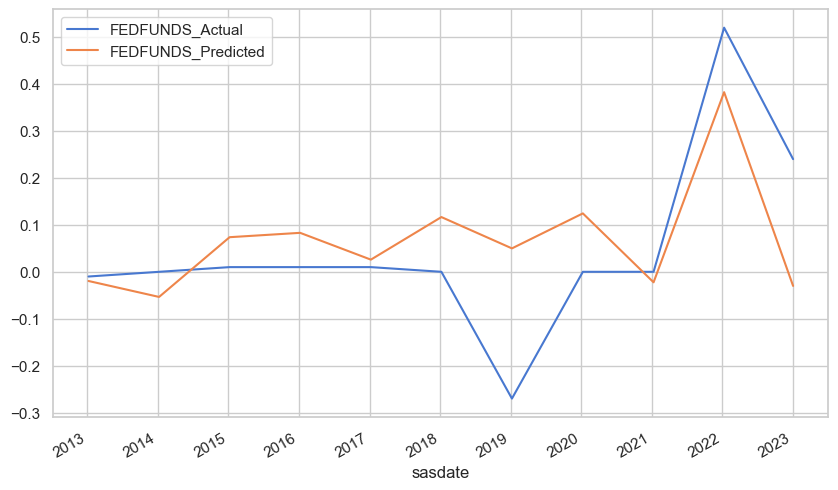

In [79]:
final['FEDFUNDS_Actual'].plot(legend=True)
final['FEDFUNDS_Predicted'].plot(legend=True)

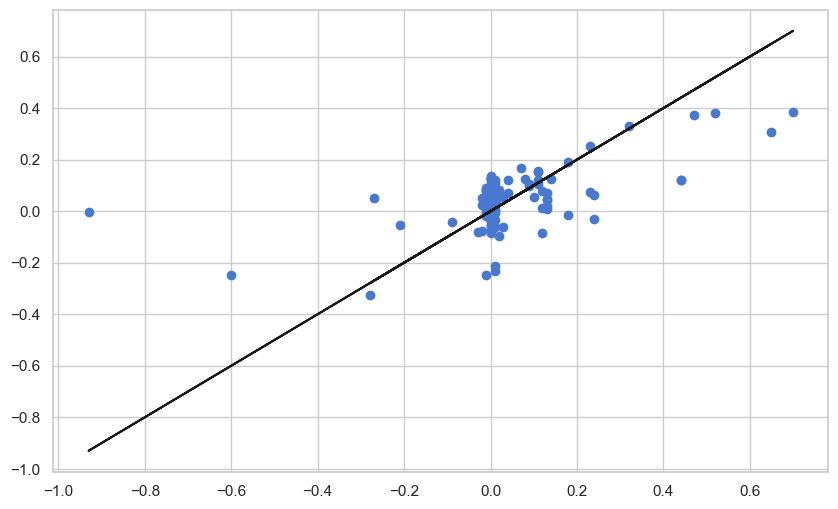

In [80]:
plt.scatter(y_test_list, y_pred_list)
plt.plot(y_test_list, y_test_list,'k-') # identity line

In [81]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')

Mean Squared Error: 0.039
Root Mean Squared Error: 0.197
Mean Absolute Error: 0.197


In [82]:
result.corr()

,FEDFUNDS_Actual,FEDFUNDS_Predicted
FEDFUNDS_Actual,1.000000,0.597186
FEDFUNDS_Predicted,0.597186,1.000000


## Conclusion

The RMSE and MAE of the model shown above are both about 0.197 and the correlation coefficient between actual FEDFUNDS and FEFUNDS predicted is 0.5972, reflecting small prediction errors in absolute terms. These results suggest that the model performs not bad in terms of minimizing numerical deviations between predicted and actual values and giving a reliable prediction, which is critical for financial forecasting tasks.

## Reference

1. LIBSVM: A Library for Support Vector Machines
2. Platt, John (1999). “Probabilistic Outputs for Support Vector Machines and Comparisons to Regularized Likelihood Methods”
3. Harsh S. Dhiman, Dipankar Deb, Josep M. Guerrero,Hybrid machine intelligent SVR variants for wind forecasting and ramp events,Renewable and Sustainable Energy Reviews.
4. An improved grid search algorithm to optimize SVR for prediction